# 1- Using Make_blob generate data of 1000 data points with three cluster apply kmeans on it with k = 3 and use the metrics and get the accuracy (For Accuracy take reference of DBSCAN evaluation)

● Apply DBscan on Cust Segmentation Data

In [1]:
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
centers = [[1, 1], [-1, -1], [1, -1]]
X, y = make_blobs(                         
    n_samples=1000, centers=centers, cluster_std=0.2, random_state=0
)


In [3]:
X.shape

(1000, 2)

In [4]:
set(y)

{0, 1, 2}

In [5]:
y.shape

(1000,)

In [6]:
from sklearn.cluster import KMeans 
k_means = KMeans(init = "k-means++", n_clusters = 3, n_init = 100) 
k_means.fit(X) 

KMeans(n_clusters=3, n_init=100)

In [7]:
X.shape

(1000, 2)

In [8]:
labels = k_means.labels_
print(labels[0:5])
print(labels.shape)
print("number of classes =",set(labels))

[1 1 2 0 2]
(1000,)
number of classes = {0, 1, 2}


In [9]:
k_means.labels_

array([1, 1, 2, 0, 2, 0, 1, 1, 2, 0, 0, 1, 2, 1, 2, 1, 0, 2, 2, 2, 2, 2,
       1, 2, 1, 0, 0, 1, 1, 0, 0, 2, 2, 2, 0, 0, 2, 0, 1, 2, 2, 2, 1, 1,
       2, 2, 2, 1, 1, 0, 0, 1, 1, 1, 0, 2, 0, 2, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 2, 1, 1, 1, 0, 1, 1, 0, 1, 1, 2, 1, 1, 1, 0, 2, 1, 2, 0, 0, 1,
       0, 1, 2, 0, 0, 1, 1, 1, 2, 0, 0, 1, 2, 1, 1, 0, 2, 1, 0, 2, 1, 1,
       2, 1, 2, 1, 2, 2, 0, 0, 1, 1, 2, 2, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       2, 2, 1, 2, 0, 1, 2, 1, 0, 2, 2, 1, 2, 2, 2, 1, 2, 1, 1, 0, 1, 1,
       0, 0, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 0, 0, 1, 0, 2, 2, 1, 2, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 1, 2, 0, 1, 0, 0, 0, 1,
       2, 0, 2, 1, 2, 0, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 0, 1,
       0, 1, 1, 1, 2, 2, 2, 0, 1, 2, 0, 0, 2, 2, 1, 0, 2, 2, 1, 1, 2, 2,
       1, 2, 2, 0, 2, 2, 2, 1, 0, 1, 2, 2, 2, 1, 2, 0, 0, 1, 2, 2, 2, 0,
       1, 2, 2, 2, 2, 2, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 2, 0, 2, 0, 1, 2,
       2, 0, 0, 1, 1, 0, 1, 2, 2, 0, 0, 2, 1, 1, 0,

In [10]:
X

array([[ 0.79028941,  0.71599641],
       [ 1.35281047,  1.08003144],
       [ 0.9008409 , -0.75668446],
       ...,
       [-0.87857767, -1.20963408],
       [-0.67368051, -0.92444817],
       [ 0.80551942, -0.73075579]])

In [11]:
from sklearn.metrics import homogeneity_score

homogeneity = homogeneity_score(y, labels)
print("Homogeneity Score:", homogeneity)

Homogeneity Score: 1.0


In [12]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(X, labels)
print(f"Silhouette Score: {silhouette_avg * 100:.2f}")


Silhouette Score: 82.07


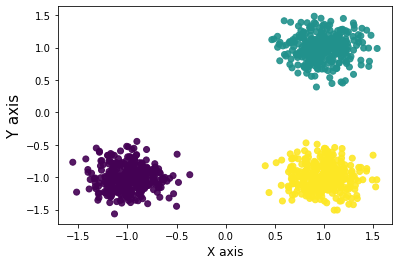

In [13]:
plt.scatter(X[:, 0], X[:, -1], c=labels, alpha=0.9)
plt.xlabel('X axis', fontsize=12)
plt.ylabel('Y axis', fontsize=15)

plt.show()

# ● Apply DBscan on Cust Segmentation Data

In [14]:
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [15]:
df = pd.read_csv("Cust_Segmentation.csv")
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Customer Id      850 non-null    int64  
 1   Age              850 non-null    int64  
 2   Edu              850 non-null    int64  
 3   Years Employed   850 non-null    int64  
 4   Income           850 non-null    int64  
 5   Card Debt        850 non-null    float64
 6   Other Debt       850 non-null    float64
 7   Defaulted        700 non-null    float64
 8   Address          850 non-null    object 
 9   DebtIncomeRatio  850 non-null    float64
dtypes: float64(4), int64(5), object(1)
memory usage: 66.5+ KB


In [17]:
df = df.drop('Address', axis=1)
df

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,5,47,1,31,253,9.308,8.908,0.0,7.2
...,...,...,...,...,...,...,...,...,...
845,846,27,1,5,26,0.548,1.220,NaN,6.8
846,847,28,2,7,34,0.359,2.021,0.0,7.0
847,848,25,4,0,18,2.802,3.210,1.0,33.4
848,849,32,1,12,28,0.116,0.696,0.0,2.9


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Customer Id      850 non-null    int64  
 1   Age              850 non-null    int64  
 2   Edu              850 non-null    int64  
 3   Years Employed   850 non-null    int64  
 4   Income           850 non-null    int64  
 5   Card Debt        850 non-null    float64
 6   Other Debt       850 non-null    float64
 7   Defaulted        700 non-null    float64
 8   DebtIncomeRatio  850 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 59.9 KB


In [19]:
df.isnull().sum()

Customer Id          0
Age                  0
Edu                  0
Years Employed       0
Income               0
Card Debt            0
Other Debt           0
Defaulted          150
DebtIncomeRatio      0
dtype: int64

In [20]:
df['Defaulted'].mean()

0.26142857142857145

In [21]:
df_mean = df.copy()

In [22]:
df_mean

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,5,47,1,31,253,9.308,8.908,0.0,7.2
...,...,...,...,...,...,...,...,...,...
845,846,27,1,5,26,0.548,1.220,NaN,6.8
846,847,28,2,7,34,0.359,2.021,0.0,7.0
847,848,25,4,0,18,2.802,3.210,1.0,33.4
848,849,32,1,12,28,0.116,0.696,0.0,2.9


In [23]:
df_mean['Defaulted'] = df_mean['Defaulted'].fillna(df_mean['Defaulted'].mean())

In [24]:
df_median = df.copy()

In [25]:
df_median

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,5,47,1,31,253,9.308,8.908,0.0,7.2
...,...,...,...,...,...,...,...,...,...
845,846,27,1,5,26,0.548,1.220,NaN,6.8
846,847,28,2,7,34,0.359,2.021,0.0,7.0
847,848,25,4,0,18,2.802,3.210,1.0,33.4
848,849,32,1,12,28,0.116,0.696,0.0,2.9


In [26]:
df_median['Defaulted'].median()


0.0

In [27]:
df_median['Defaulted'] = df_median['Defaulted'].fillna(df_median['Defaulted'].median())

In [28]:
df_mode = df.copy()

In [29]:
df_mode['Defaulted'].mode()

0    0.0
Name: Defaulted, dtype: float64

In [30]:
df_mode['Defaulted'] = df_mode['Defaulted'].fillna(df_mode['Defaulted'].mode()[0])

In [31]:
df['Defaulted'].std()

0.43972707660624355

In [32]:
df_mean['Defaulted'].std()

0.3989954574466963

In [33]:
df_median['Defaulted'].std()

0.41126822222629794

In [34]:
df_mode['Defaulted'].std()

0.41126822222629794

In [35]:
new_df = df_mode

In [36]:
new_df = new_df.drop('Customer Id', axis=1)


In [37]:
new_df

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,41,2,6,19,0.124,1.073,0.0,6.3
1,47,1,26,100,4.582,8.218,0.0,12.8
2,33,2,10,57,6.111,5.802,1.0,20.9
3,29,2,4,19,0.681,0.516,0.0,6.3
4,47,1,31,253,9.308,8.908,0.0,7.2
...,...,...,...,...,...,...,...,...
845,27,1,5,26,0.548,1.220,0.0,6.8
846,28,2,7,34,0.359,2.021,0.0,7.0
847,25,4,0,18,2.802,3.210,1.0,33.4
848,32,1,12,28,0.116,0.696,0.0,2.9


In [38]:
new_df.shape

(850, 8)

In [39]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              850 non-null    int64  
 1   Edu              850 non-null    int64  
 2   Years Employed   850 non-null    int64  
 3   Income           850 non-null    int64  
 4   Card Debt        850 non-null    float64
 5   Other Debt       850 non-null    float64
 6   Defaulted        850 non-null    float64
 7   DebtIncomeRatio  850 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 53.2 KB


In [40]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [41]:
data = ss.fit_transform(new_df)

In [42]:
data

array([[ 0.74291541,  0.31212243, -0.37878978, ..., -0.59048916,
        -0.52379654, -0.57652509],
       [ 1.48949049, -0.76634938,  2.5737211 , ...,  1.51296181,
        -0.52379654,  0.39138677],
       [-0.25251804,  0.31212243,  0.2117124 , ...,  0.80170393,
         1.90913822,  1.59755385],
       ...,
       [-1.24795149,  2.46906604, -1.26454304, ...,  0.03863257,
         1.90913822,  3.45892281],
       [-0.37694723, -0.76634938,  0.50696349, ..., -0.70147601,
        -0.52379654, -1.08281745],
       [ 2.1116364 , -0.76634938,  1.09746566, ...,  0.16463355,
        -0.52379654, -0.2340332 ]])

In [43]:
from sklearn.cluster import DBSCAN

In [44]:
clust = DBSCAN(eps = 7, min_samples = 20)


In [45]:
clust.fit(data)

DBSCAN(eps=7, min_samples=20)

In [46]:
clust.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0

In [47]:
set(clust.labels_)

{-1, 0}

In [48]:
len(set(clust.labels_))

2

In [49]:
from sklearn.metrics import silhouette_score
print("Score:",silhouette_score (data,clust.labels_))

Score: 0.7264934311900959


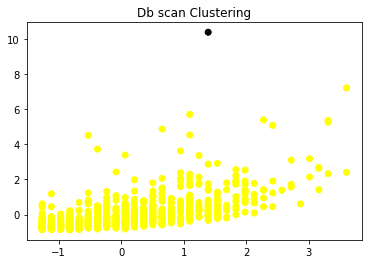

In [50]:
colormap = np.array(['yellow', 'green','black'])
plt.scatter(data[:,2], data[:,3], color = colormap[clust.labels_])
plt.title("Db scan Clustering")
plt.show()

# 2-Using dirtydata.csv Demonstrate all the techniques for removing the null values
● Replace by MEAN

● Replace by MEDIAN

● Replace by MODE

● Replace by ARBITUARY VALUE

● Replace by 0


In [51]:
import pandas as pd


In [52]:
data = pd.read_csv("dirtydata.csv")
data.head()

,Duration,Date,Pulse,Maxpulse,Calories
0,60,'2020/12/01',110,130,409.1
1,60,'2020/12/02',117,145,479.0
2,60,'2020/12/03',103,135,340.0
3,45,'2020/12/04',109,175,282.4
4,45,'2020/12/05',117,148,406.0


In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Duration  32 non-null     int64  
 1   Date      31 non-null     object 
 2   Pulse     32 non-null     int64  
 3   Maxpulse  32 non-null     int64  
 4   Calories  30 non-null     float64
dtypes: float64(1), int64(3), object(1)
memory usage: 1.4+ KB


In [54]:
data.isnull().sum() 

Duration    0
Date        1
Pulse       0
Maxpulse    0
Calories    2
dtype: int64

# Applying Mean

In [55]:
df_mean = data.copy()

In [56]:
df_mean['Calories'].mean()

304.68

In [57]:
df_mean['Calories'] = df_mean['Calories'].fillna(df_mean['Calories'].mean())

In [58]:
df_mean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Duration  32 non-null     int64  
 1   Date      31 non-null     object 
 2   Pulse     32 non-null     int64  
 3   Maxpulse  32 non-null     int64  
 4   Calories  32 non-null     float64
dtypes: float64(1), int64(3), object(1)
memory usage: 1.4+ KB


# Applying median

In [59]:
df_median = data.copy()

In [60]:
df_median['Calories'].median()

291.2

In [61]:
df_median['Calories'] = df_median['Calories'].fillna(df_median['Calories'].median())

In [62]:
df_median.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Duration  32 non-null     int64  
 1   Date      31 non-null     object 
 2   Pulse     32 non-null     int64  
 3   Maxpulse  32 non-null     int64  
 4   Calories  32 non-null     float64
dtypes: float64(1), int64(3), object(1)
memory usage: 1.4+ KB


# Applying mode

In [63]:
df_mode = data.copy()

In [64]:
df_mode['Calories'].mode()

0    300.0
Name: Calories, dtype: float64

In [65]:
df_mode['Date'].mode()

0    '2020/12/12'
Name: Date, dtype: object

In [66]:
df_mode['Calories'] = df_mode['Calories'].fillna(df_mode['Calories'].mode()[0])

In [67]:
df_mode['Date'] = df_mode['Date'].fillna(df_mode['Date'].mode()[0])

In [68]:
df_mode.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Duration  32 non-null     int64  
 1   Date      32 non-null     object 
 2   Pulse     32 non-null     int64  
 3   Maxpulse  32 non-null     int64  
 4   Calories  32 non-null     float64
dtypes: float64(1), int64(3), object(1)
memory usage: 1.4+ KB



# ARBITUARY VALUE

In [69]:
df_arb = data.copy()

In [70]:
df_arb['Calories'] = df_arb['Calories'].fillna(555)

In [71]:
df_arb['Date'] = df_arb['Date'].fillna("2020/1/1")

In [72]:
df_arb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Duration  32 non-null     int64  
 1   Date      32 non-null     object 
 2   Pulse     32 non-null     int64  
 3   Maxpulse  32 non-null     int64  
 4   Calories  32 non-null     float64
dtypes: float64(1), int64(3), object(1)
memory usage: 1.4+ KB


# Replace by 0

In [73]:
df_zero = data.copy()

In [74]:
df_zero= df_zero.fillna(0)

In [75]:
df_zero

,Duration,Date,Pulse,Maxpulse,Calories
0,60,'2020/12/01',110,130,409.1
1,60,'2020/12/02',117,145,479.0
2,60,'2020/12/03',103,135,340.0
3,45,'2020/12/04',109,175,282.4
4,45,'2020/12/05',117,148,406.0
5,60,'2020/12/06',102,127,300.0
6,60,'2020/12/07',110,136,374.0
7,450,'2020/12/08',104,134,253.3
8,30,'2020/12/09',109,133,195.1
9,60,'2020/12/10',98,124,269.0


In [76]:
df_zero.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Duration  32 non-null     int64  
 1   Date      32 non-null     object 
 2   Pulse     32 non-null     int64  
 3   Maxpulse  32 non-null     int64  
 4   Calories  32 non-null     float64
dtypes: float64(1), int64(3), object(1)
memory usage: 1.4+ KB
